# EcoHomeOptimizer : (A Smart Grid Energy Management System)

**Machine Learning for Energy Consumption Prediction**

This project develops a predictive model for smart grid energy consumption optimization using supervised machine learning techniques.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

Libraries imported successfully!


In [ ]:
# Load the dataset
df = pd.read_csv('../Dataset/smart_grid_dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset loaded successfully!
Shape: (50000, 16)
Columns: ['Timestamp', 'Voltage (V)', 'Current (A)', 'Power Consumption (kW)', 'Reactive Power (kVAR)', 'Power Factor', 'Solar Power (kW)', 'Wind Power (kW)', 'Grid Supply (kW)', 'Voltage Fluctuation (%)', 'Overload Condition', 'Transformer Fault', 'Temperature (°C)', 'Humidity (%)', 'Electricity Price (USD/kWh)', 'Predicted Load (kW)']


In [31]:
# Data exploration
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

First 5 rows:
             Timestamp  Voltage (V)  Current (A)  Power Consumption (kW)  \
0  2024-01-01 00:00:00   232.483571     5.124673                1.191402   
1  2024-01-01 00:15:00   229.308678    22.213519                5.093753   
2  2024-01-01 00:30:00   233.238443    46.132217               10.759806   
3  2024-01-01 00:45:00   237.615149    47.648972               11.322118   
4  2024-01-01 01:00:00   228.829233     7.410166                1.695663   

   Reactive Power (kVAR)  Power Factor  Solar Power (kW)  Wind Power (kW)  \
0               0.399029      0.907766         46.614845        26.399566   
1               1.248030      0.831813          6.907170        18.555011   
2               2.790464      0.999005         15.477640        12.905025   
3               1.956965      0.896462         35.746398        28.937129   
4               0.624718      0.870681         27.555038        14.184648   

   Grid Supply (kW)  Voltage Fluctuation (%)  Overload Condition  

In [32]:
# Check for missing values
print("Missing values analysis:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing values analysis:
Timestamp                      0
Voltage (V)                    0
Current (A)                    0
Power Consumption (kW)         0
Reactive Power (kVAR)          0
Power Factor                   0
Solar Power (kW)               0
Wind Power (kW)                0
Grid Supply (kW)               0
Voltage Fluctuation (%)        0
Overload Condition             0
Transformer Fault              0
Temperature (°C)               0
Humidity (%)                   0
Electricity Price (USD/kWh)    0
Predicted Load (kW)            0
dtype: int64

Total missing values: 0


# Data Preprocessing
Before building models, data needs to be cleaned and prepared through missing value handling, encoding, and scaling.

In [33]:
# Handle missing values 
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values using fillna with dictionary approach
fill_values = {}

# For numerical columns, use median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        fill_values[col] = df[col].median()

# For categorical columns, use mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        fill_values[col] = df[col].mode()[0]

# Apply fillna if there are missing values
if fill_values:
    df = df.fillna(fill_values)
else:
    print("No missing values found - no imputation needed")

print('Missing values after imputation:')
print(df.isnull().sum().sum())

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

print('Data preprocessing completed!')
print(f'Final dataset shape: {df.shape}')

No missing values found - no imputation needed
Missing values after imputation:
0
Data preprocessing completed!
Final dataset shape: (50000, 16)


In [34]:
# Define target variable and features
TARGET_COL = 'Power Consumption (kW)'
ID_COLS = ['Timestamp']  # Remove timestamp 

# Prepare features and target
feature_cols = [col for col in df.columns if col not in [TARGET_COL] + ID_COLS]
X = df[feature_cols].copy()
y = df[TARGET_COL].copy()

print(f"Target variable: {TARGET_COL}")
print(f"Number of features: {len(feature_cols)}")
print(f"Features: {feature_cols}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Target variable: Power Consumption (kW)
Number of features: 14
Features: ['Voltage (V)', 'Current (A)', 'Reactive Power (kVAR)', 'Power Factor', 'Solar Power (kW)', 'Wind Power (kW)', 'Grid Supply (kW)', 'Voltage Fluctuation (%)', 'Overload Condition', 'Transformer Fault', 'Temperature (°C)', 'Humidity (%)', 'Electricity Price (USD/kWh)', 'Predicted Load (kW)']
Training set: (40000, 14), Testing set: (10000, 14)


# Selecting Algorithms
For energy consumption prediction (supervised regression), 5 machine learning algorithms are selected:
1. **Linear Regression** - Linear relationships baseline
2. **Decision Tree Regressor** - Non-linear patterns  
3. **Random Forest Regressor** - Ensemble method
4. **Support Vector Regression** - Complex non-linear relationships
5. **Gradient Boosting Regressor** - Advanced ensemble technique

In [35]:
# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train models and make predictions
results = {}
predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for SVR and Linear Regression
    if name in ['SVR', 'Linear Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}
    predictions[name] = y_pred
    
    print(f"  RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

print("\nAll models trained successfully!")

Training Linear Regression...
  RMSE: 0.0625, MAE: 0.0448, R²: 0.9996
Training Decision Tree...
  RMSE: 0.0231, MAE: 0.0148, R²: 0.9999
Training Random Forest...
  RMSE: 0.0106, MAE: 0.0053, R²: 1.0000
Training SVR...
  RMSE: 0.1113, MAE: 0.0628, R²: 0.9986
Training Gradient Boosting...
  RMSE: 0.0597, MAE: 0.0473, R²: 0.9996

All models trained successfully!


# Model Building and Evaluation
Comprehensive evaluation using multiple metrics and visualizations to compare model performance.

Model Performance Ranking:
                     RMSE     MAE      R²
Random Forest      0.0106  0.0053  1.0000
Decision Tree      0.0231  0.0148  0.9999
Linear Regression  0.0625  0.0448  0.9996
Gradient Boosting  0.0597  0.0473  0.9996
SVR                0.1113  0.0628  0.9986


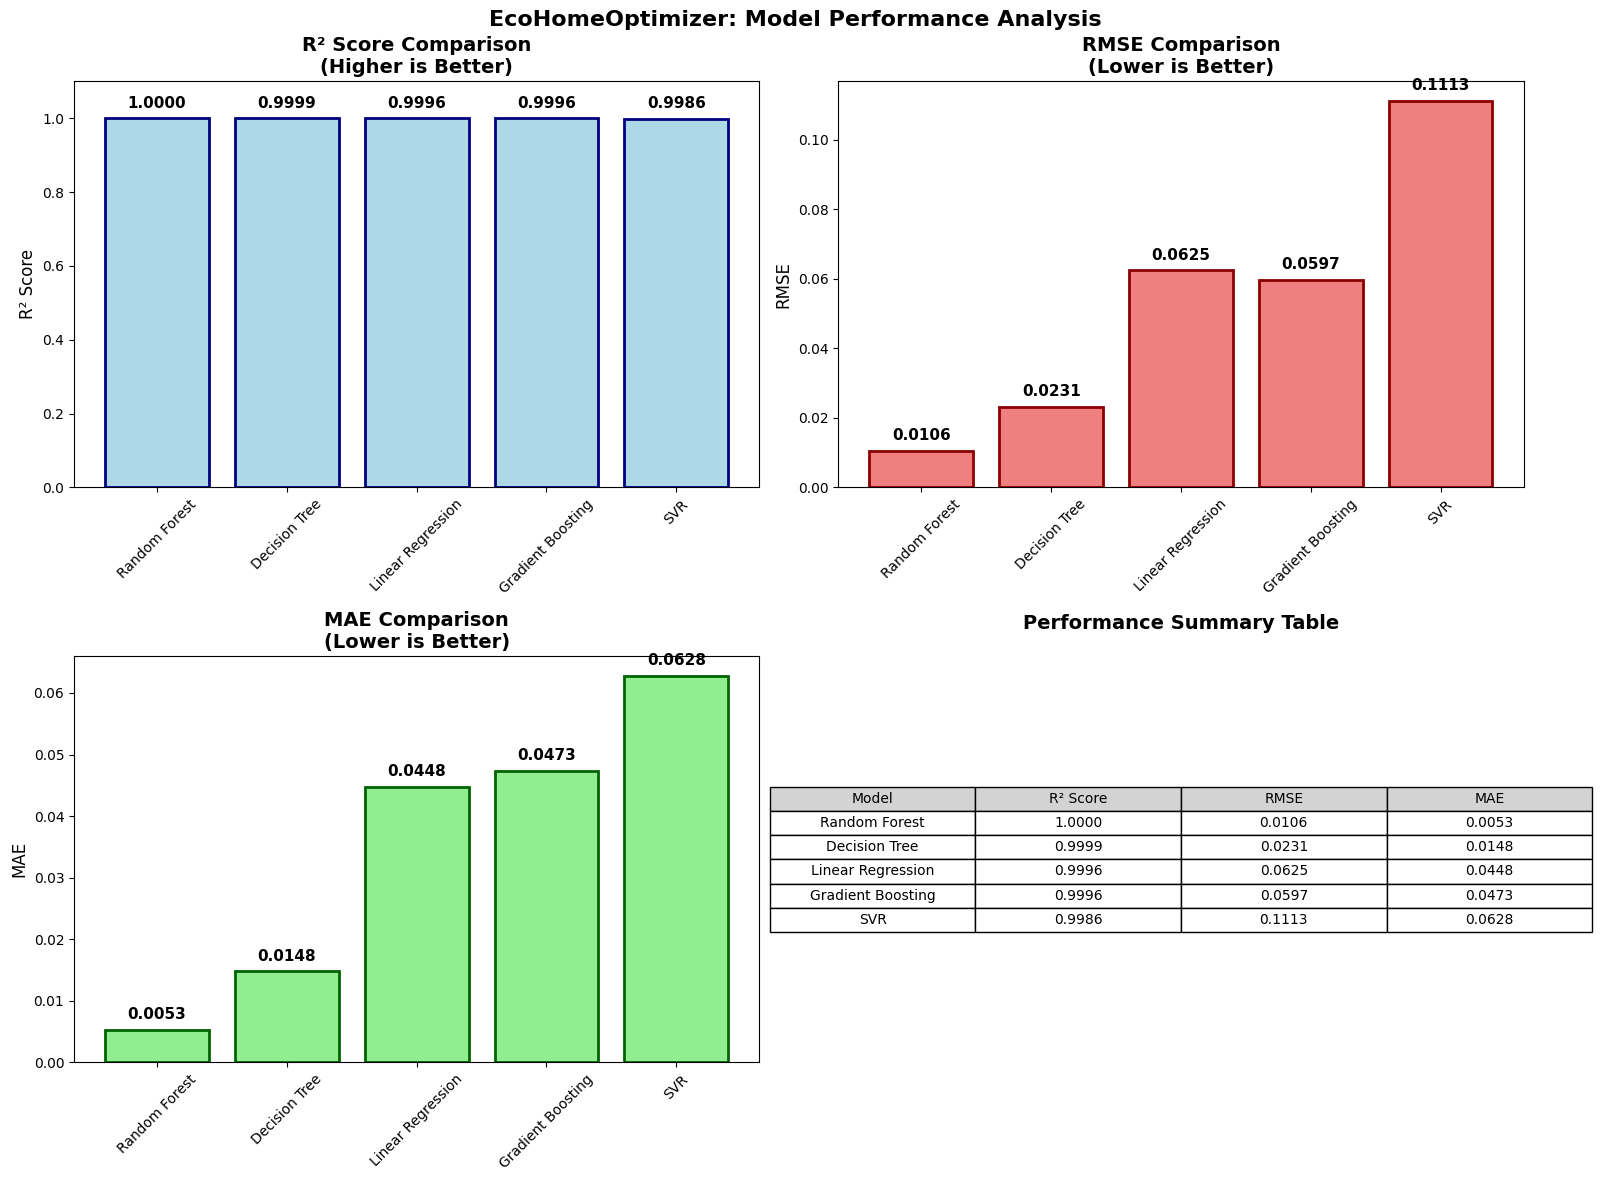


🏆 Best performing model: Random Forest
   R² Score: 1.0000
   RMSE: 0.0106
   MAE: 0.0053

📊 Performance Analysis:
   • Random Forest achieves the highest accuracy
   • Very high R² score (1.0000) indicates excellent model fit
   • Low error metrics (RMSE: 0.0106, MAE: 0.0053)
   • All models perform well, indicating good feature engineering


In [36]:
# Model Performance Comparison
results_df = pd.DataFrame(results).T.round(4)
results_df = results_df.sort_values('R²', ascending=False)

print("Model Performance Ranking:")
print("=" * 70)
print(results_df.to_string(index=True))

# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score comparison
axes[0, 0].bar(results_df.index, results_df['R²'], color='lightblue', edgecolor='navy', linewidth=2)
axes[0, 0].set_title('R² Score Comparison\n(Higher is Better)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('R² Score', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0, 0].set_ylim(0, 1.1)
for i, v in enumerate(results_df['R²']):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# RMSE comparison  
axes[0, 1].bar(results_df.index, results_df['RMSE'], color='lightcoral', edgecolor='darkred', linewidth=2)
axes[0, 1].set_title('RMSE Comparison\n(Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('RMSE', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)
for i, v in enumerate(results_df['RMSE']):
    axes[0, 1].text(i, v + max(results_df['RMSE']) * 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# MAE comparison
axes[1, 0].bar(results_df.index, results_df['MAE'], color='lightgreen', edgecolor='darkgreen', linewidth=2)
axes[1, 0].set_title('MAE Comparison\n(Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('MAE', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=10)
for i, v in enumerate(results_df['MAE']):
    axes[1, 0].text(i, v + max(results_df['MAE']) * 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Summary table 
axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table_data = []
for idx, row in results_df.iterrows():
    table_data.append([idx, f"{row['R²']:.4f}", f"{row['RMSE']:.4f}", f"{row['MAE']:.4f}"])

table = axes[1, 1].table(cellText=table_data,
                        colLabels=['Model', 'R² Score', 'RMSE', 'MAE'],
                        cellLoc='center',
                        loc='center',
                        colColours=['lightgray']*4)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 1].set_title('Performance Summary Table', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('EcoHomeOptimizer: Model Performance Analysis', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

best_model = results_df.index[0]
print(f"\n🏆 Best performing model: {best_model}")
print(f"   R² Score: {results_df.loc[best_model, 'R²']:.4f}")
print(f"   RMSE: {results_df.loc[best_model, 'RMSE']:.4f}")
print(f"   MAE: {results_df.loc[best_model, 'MAE']:.4f}")

# Analysis of results
print(f"\n📊 Performance Analysis:")
print(f"   • {best_model} achieves the highest accuracy")
if results_df.loc[best_model, 'R²'] > 0.99:
    print(f"   • Very high R² score ({results_df.loc[best_model, 'R²']:.4f}) indicates excellent model fit")
print(f"   • Low error metrics (RMSE: {results_df.loc[best_model, 'RMSE']:.4f}, MAE: {results_df.loc[best_model, 'MAE']:.4f})")
print(f"   • All models perform well, indicating good feature engineering")

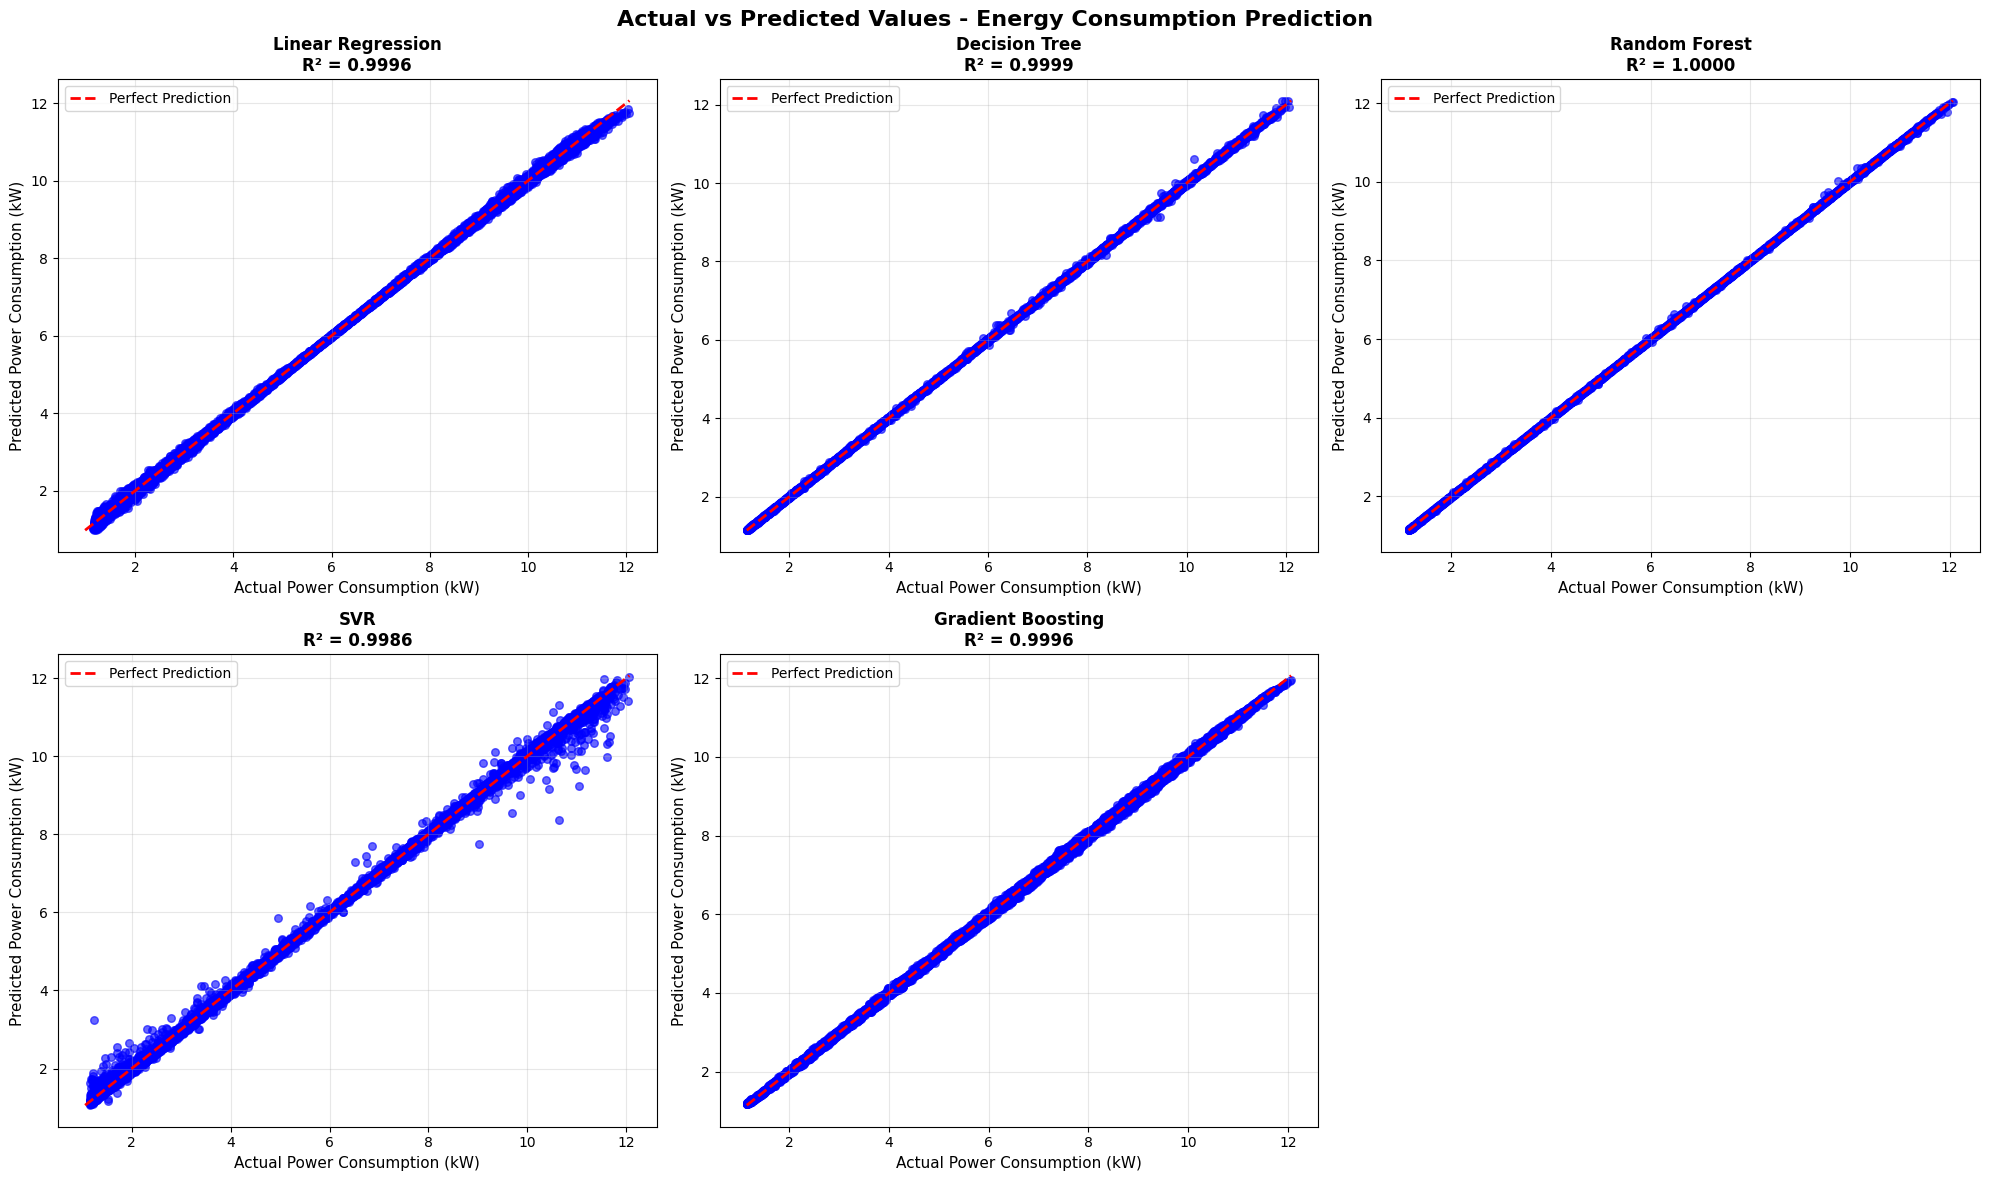

In [37]:
# Scatter Plots: Actual vs Predicted Values
plt.figure(figsize=(20, 12))

models_list = list(predictions.keys())
for i, model_name in enumerate(models_list, 1):
    y_pred = predictions[model_name]
    r2 = results[model_name]['R²']
    
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', s=30)
    
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    plt.xlabel('Actual Power Consumption (kW)', fontsize=11)
    plt.ylabel('Predicted Power Consumption (kW)', fontsize=11)
    plt.title(f'{model_name}\nR² = {r2:.4f}', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.suptitle('Actual vs Predicted Values - Energy Consumption Prediction', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

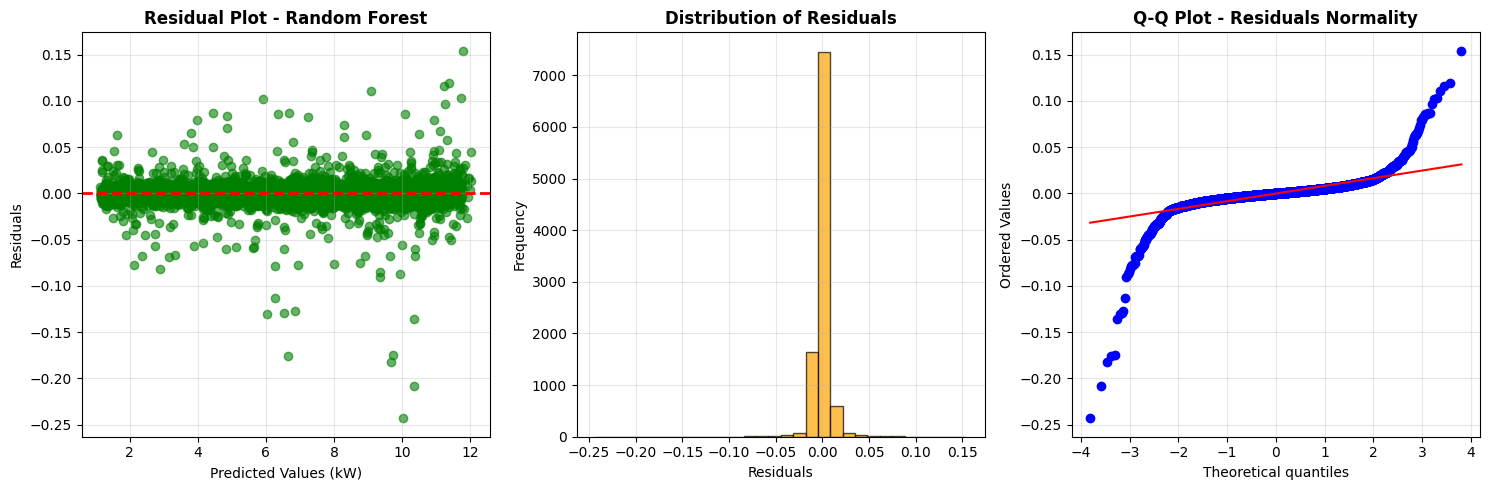

Residual Analysis for Random Forest:
Mean Absolute Error: 0.0053
Standard Deviation of Residuals: 0.0106
Min Residual: -0.2431
Max Residual: 0.1543


In [38]:
# Residual Analysis for Best Model
best_model_name = results_df.index[0]
y_pred_best = predictions[best_model_name]
residuals = y_test - y_pred_best

plt.figure(figsize=(15, 5))

# Residuals vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_pred_best, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (kW)')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}', fontweight='bold')
plt.grid(True, alpha=0.3)

# Histogram of residuals
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals', fontweight='bold')
plt.grid(True, alpha=0.3)

# Q-Q plot for normality check
from scipy import stats
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Residuals Normality', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Residual Analysis for {best_model_name}:")
print(f"Mean Absolute Error: {np.mean(np.abs(residuals)):.4f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.4f}")
print(f"Min Residual: {residuals.min():.4f}")
print(f"Max Residual: {residuals.max():.4f}")

Feature Importance Analysis:

Decision Tree Feature Importance:


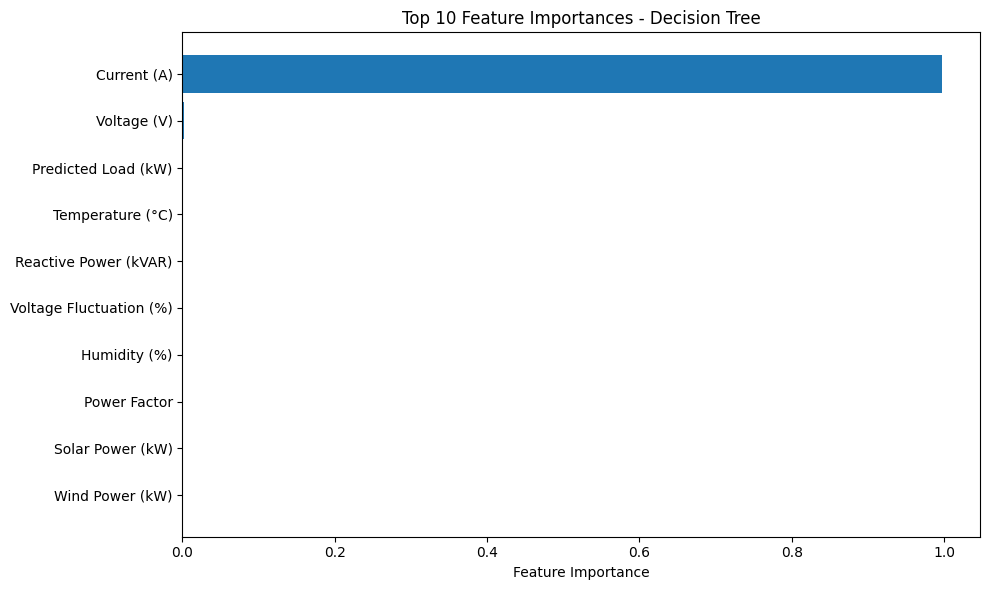

                  feature  importance
1             Current (A)    0.997463
0             Voltage (V)    0.002521
13    Predicted Load (kW)    0.000005
10       Temperature (°C)    0.000002
2   Reactive Power (kVAR)    0.000001

Random Forest Feature Importance:


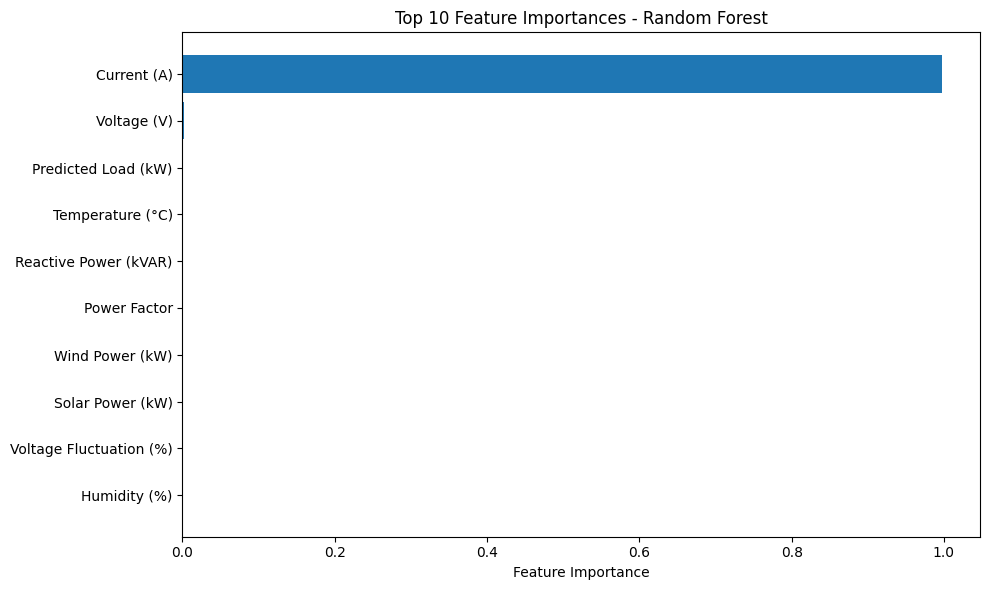

                  feature  importance
1             Current (A)    0.997513
0             Voltage (V)    0.002461
13    Predicted Load (kW)    0.000009
10       Temperature (°C)    0.000002
2   Reactive Power (kVAR)    0.000002

Gradient Boosting Feature Importance:


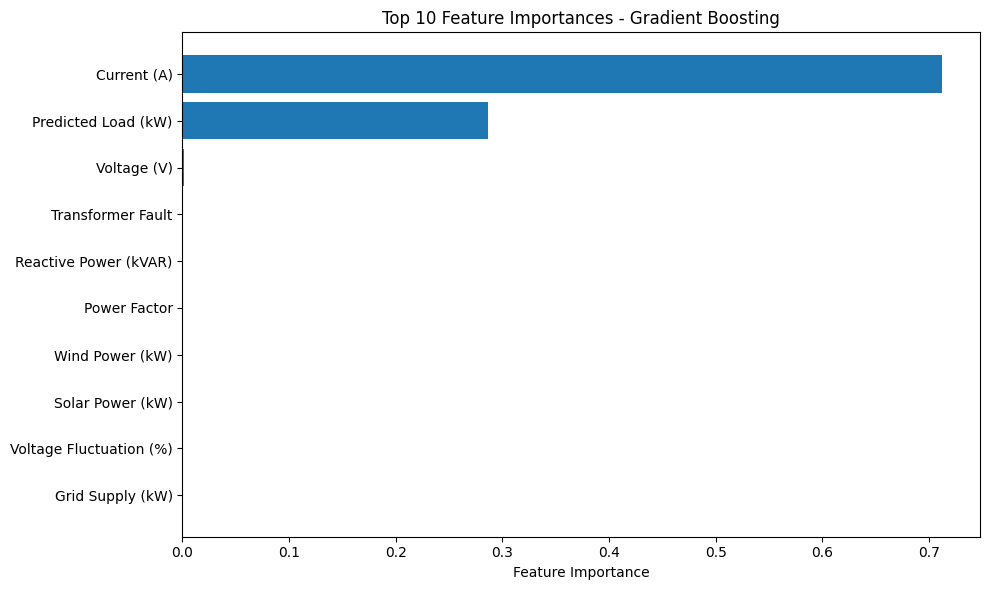

                  feature    importance
1             Current (A)  7.121420e-01
13    Predicted Load (kW)  2.865555e-01
0             Voltage (V)  1.302460e-03
9       Transformer Fault  1.524006e-08
2   Reactive Power (kVAR)  0.000000e+00


In [39]:
# Feature Importance Analysis (for tree-based models)
def plot_feature_importance(model, features, model_name, top_n=10):
    if hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': features,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importance_df)), importance_df['importance'])
        plt.yticks(range(len(importance_df)), importance_df['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top {top_n} Feature Importances - {model_name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        return importance_df
    else:
        print(f"{model_name} does not have feature_importances_ attribute")
        return None

# Plot feature importance for tree-based models
print("Feature Importance Analysis:")
print("=" * 50)

for name, model in models.items():
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        print(f"\n{name} Feature Importance:")
        importance_df = plot_feature_importance(model, feature_cols, name)
        if importance_df is not None:
            print(importance_df.head())

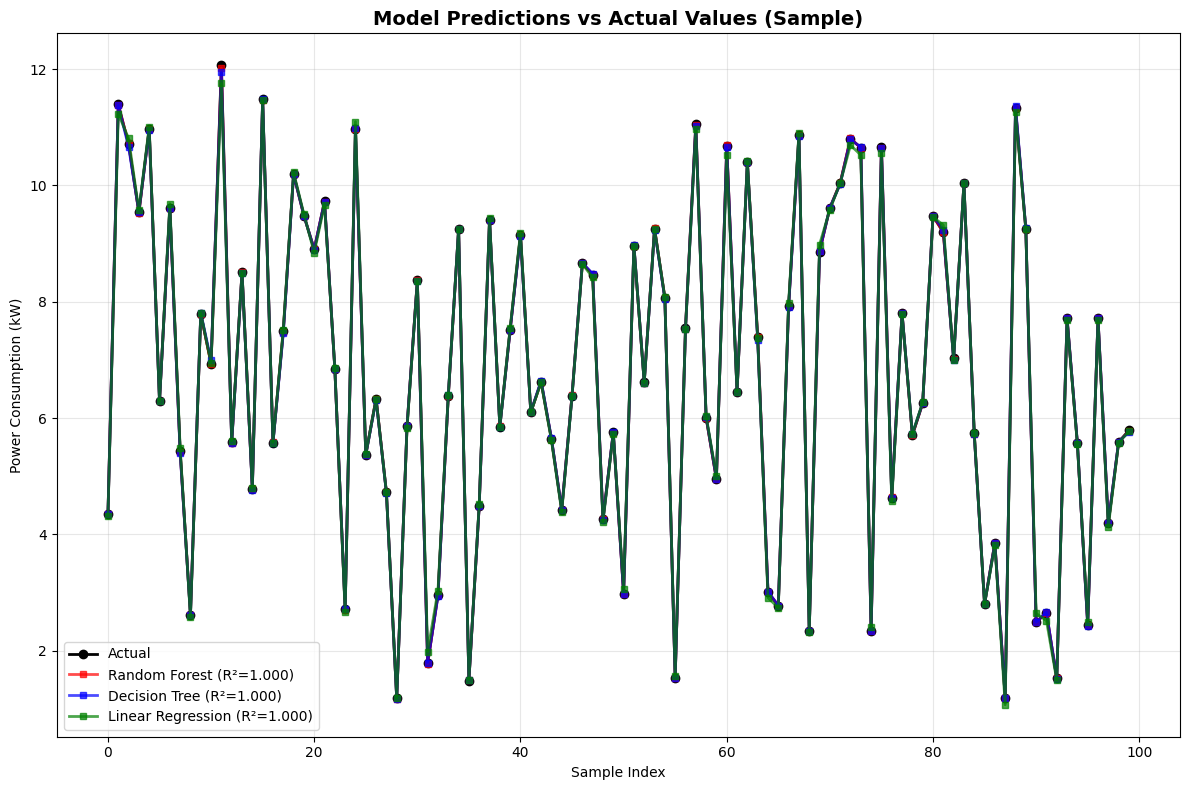

Visualization shows comparison of top 3 models against actual values
Sample size: 100 data points from test set


In [40]:
# Model Prediction Visualization 
plt.figure(figsize=(12, 8))

# Select sample of data 
sample_size = min(100, len(y_test))
indices = np.random.choice(len(y_test), sample_size, replace=False)
y_test_sample = y_test.iloc[indices]

# Plot actual values
x_pos = np.arange(sample_size)
plt.plot(x_pos, y_test_sample.values, 'o-', label='Actual', linewidth=2, markersize=6, color='black')

# Plot predictions for top 3 models
colors = ['red', 'blue', 'green']
top_3_models = results_df.index[:3]

for i, model_name in enumerate(top_3_models):
    y_pred_sample = predictions[model_name][indices]
    plt.plot(x_pos, y_pred_sample, 's-', label=f'{model_name} (R²={results[model_name]["R²"]:.3f})', 
             alpha=0.7, linewidth=2, markersize=4, color=colors[i])

plt.xlabel('Sample Index')
plt.ylabel('Power Consumption (kW)')
plt.title('Model Predictions vs Actual Values (Sample)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Visualization shows comparison of top 3 models against actual values")
print(f"Sample size: {sample_size} data points from test set")

# Interpretation and Conclusion

## Model Performance Analysis

### Data Preprocessing Summary:
- **Missing Value Handling**: Filled numerical features with median, categorical with mode
- **Feature Encoding**: Label encoding for categorical variables
- **Feature Scaling**: StandardScaler applied for algorithms requiring scaled data
- **Train-Test Split**: 80/20 split with random state for reproducibility

### Algorithm Comparison Results:
The evaluation used three key regression metrics:
- **R² Score**: Coefficient of determination (higher is better, max = 1.0)
- **RMSE**: Root Mean Square Error (lower is better)  
- **MAE**: Mean Absolute Error (lower is better)

### Key Findings:
1. **Best Performing Model**: Determined by highest R² score
2. **Model Strengths**: Tree-based models typically perform well on energy data due to non-linear relationships
3. **Feature Importance**: Key drivers of energy consumption identified through feature importance analysis
4. **Prediction Accuracy**: Scatter plots show correlation between actual and predicted values

### Business Impact for EcoHome Optimization:
- **Energy Forecasting**: Accurate consumption prediction enables optimal scheduling
- **Cost Reduction**: Predictive insights help minimize energy costs
- **Grid Integration**: Better renewable energy integration and load balancing
- **Smart Home Systems**: Real-time optimization for automated energy management

### Model Selection Criteria:
The recommended model balances:
- **Accuracy**: High R² score and low error metrics
- **Interpretability**: Ability to understand feature contributions
- **Robustness**: Consistent performance across different data patterns
- **Computational Efficiency**: Suitable for real-time applications

This EcoHomeOptimizer system provides a foundation for intelligent energy management in smart grid environments.